#### Initializing the "Token's and Key's" using which we will get the tweets from Twitter

In [ ]:
#Twitter access token's
Twitter_Access_Token = ""
Twitter_Access_Token_Secret = ""

In [ ]:
#Twitter consumer API keys
Twitter_Consumer_API_Key = ""
Twitter_Consumer_API_Key_Secret = ""

#### Importing the library "Tweepy" to work with datasets/data from twitter

#### and setting up the API keys and Tokens

In [ ]:
import tweepy as Tweeps

In [ ]:
#Setting up an authentication instance
Twitter_Authentication_Instance = Tweeps.OAuthHandler(Twitter_Consumer_API_Key, Twitter_Consumer_API_Key_Secret)

#Setting up an access key/token and secret key/token
Twitter_Authentication_Instance.set_access_token(Twitter_Access_Token, Twitter_Access_Token_Secret)

#### Creating the API object using which we will be hitting the API end points to get data from Twitter

In [ ]:
#Setting up the Twitter API instance
Twitter_API_Instance = Tweeps.API(Twitter_Authentication_Instance)

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from datetime import date
from datetime import datetime
import numpy as np

In [ ]:
#Method to get tweets for a particular date, this is done based on an automated waiting loop
#This Method collects 400 tweets every 15 mins
#This 15 mins is waited out due to restriction twitter has placed on max number of tweets 
# that can be pulled retrieved by a students account. 

def GetTweets(keyword, date):
    global Tweets_Dictionary
    Twitter_Result_Tweets = Tweeps.Cursor(Twitter_API_Instance.search_tweets, 
                                              q="#"+keyword+"-filter:retweets", 
                                              lang="en",
                                              tweet_mode="extended",
                                              until='2021-10-21').items(400)
    for tweets in Twitter_Result_Tweets:
            Tweets_Dictionary['tweet id'].append(tweets.id)
            Tweets_Dictionary['time of tweet'].append(tweets.created_at)
            Tweets_Dictionary['user id'].append(tweets.user.id)
            Tweets_Dictionary['user name'].append(tweets.user.screen_name)
            Tweets_Dictionary['text'].append(tweets.full_text)  
    
    time.sleep(900)
    

    
#Used to get mulitple tweets for the same word every few minutes    
Tweet_Iterrations = 3


today = date.today()
formatted_date = today.strftime("%Y-%m-%d")
Twitter_Search_List = ['altcoin','bitcoin', 'coindesk', 'cryptocurrency', 
                         'gold', 'APPL', 'GOOG', 'YHOO']


for keyword in Twitter_Search_List:
#refreshing the dictionary for every time a keyword changes
    Tweets_Dictionary = dict()
    Tweets_Dictionary['tweet id'] = []
    Tweets_Dictionary['time of tweet'] = []
    Tweets_Dictionary['user id'] = []
    Tweets_Dictionary['user name'] = []
    Tweets_Dictionary['text'] = []
    
    #continuos iterations to collect 1200 tweets every 45 mins 
    for iterration in range(0, 3):
        GetTweets(keyword, formatted_date)
    
    print(f"{keyword}Tweets Collected")
    Keyword_DataFrame = pd.DataFrame(Tweets_Dictionary)
    Keyword_DataFrame.to_csv(f"Assignment Datasets/{keyword}.csv", index=False)
    

altcoinTweets Collected
bitcoinTweets Collected
coindeskTweets Collected


#### Displaying the data we have stored in the CSV files

In [ ]:
#Displaying the first ten records/observations/ tweets for the gold ticker symbol

gold_Data_Frame = pd.read_csv('Uncleaned Tweets/gold.csv')
gold_Data_Frame['tweet id'] = [int(tweetID) for tweetID in gold_Data_Frame['tweet id']]
gold_Data_Frame.head(10)

,tweet id,time of tweet,user id,user name,text
0,1448440000000000000,2021-10-13 23:59:53+00:00,1.684737e+08,chipzallday,$PMR $PMR.V SP .125cts. One thing I know is ca...
1,1448440000000000000,2021-10-13 23:58:17+00:00,9.594160e+17,Franklin_FinAus,Literally PANIC here.. We still await for resu...
2,1448440000000000000,2021-10-13 23:56:34+00:00,7.436744e+07,cryptoCanes,@PeterSchiff Only reason I won’t buy gold is y...
3,1448440000000000000,2021-10-13 23:56:06+00:00,1.277480e+18,CreativeMurdock,"I can smell #GOLD, Keep Drilling!\n $MKG 🇦🇺 #A..."
4,1448440000000000000,2021-10-13 23:54:10+00:00,2.184306e+08,OptiontradinIQ,Preparing For A Financial Crisis https://t.co/...
5,1448440000000000000,2021-10-13 23:54:06+00:00,1.631591e+09,JJMaTrader,@PeterSchiff #gold is cheap compared to #bitco...
6,1448440000000000000,2021-10-13 23:53:28+00:00,3.037062e+09,sherry71759,Excited to share the latest addition to my #et...
7,1448440000000000000,2021-10-13 23:52:46+00:00,3.397384e+07,PipCzar,For the #gold bulls ---&gt; https://t.co/Xvd4J...
8,1448440000000000000,2021-10-13 23:52:44+00:00,1.684737e+08,chipzallday,$GOLD SP $1792. Testing and Looking to break ...
9,1448440000000000000,2021-10-13 23:52:21+00:00,1.542076e+08,LeoTheGreat300,"in jan/feb you'll be saying ""maybe 3rd or 4th ..."


In [ ]:
import regex as re
gruber = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

#### Here we are importing the punctuations from the inbuilt library string

In [ ]:
from string import punctuation

#### Cleaning the collected Tweets by removing duplications, punctuations, numbers, and words with length less than 2

In [ ]:
#Method used to clean out duplications, punctuations, numbers and words less than length 2   
def Cleaning_Tweets_Data(Keyword_DataFrame, keyword):
    global cleaned_tweet
    split_tweet = ""
    punctuation_free_tweets = list()
    #Removing duplicates tweets
    Keyword_DataFrame.drop_duplicates(['text'], inplace=True)
    
    #Correcting the data type of tweet ID
    Keyword_DataFrame['tweet id'] = [int(tweetID) for tweetID in Keyword_DataFrame['tweet id']]
    
    #Removes any form of punctuations while maintaining the the punctuations of url...    
    for tweet in Keyword_DataFrame['text']:
        punc_table = {ord(c): None for c in punctuation}
        final_tweet =  "".join(t if i % 2 else t.translate(punc_table) for (i, t) in enumerate(gruber.split(tweet)))
        punctuation_free_tweets.append(final_tweet)
    Keyword_DataFrame["text"] = punctuation_free_tweets
    Remove_Numbers_From_Tweet(Keyword_DataFrame, keyword)

    

#Method to remove numbers from the tweets
def Remove_Numbers_From_Tweet(Keyword_DataFrame, keyword):
    Keyword_DataFrame['text'] = Keyword_DataFrame['text'].str.replace('\d', '')
    Fallback_words_2(Keyword_DataFrame, keyword)

    
#This is a fallback regex based method to check for any left out words of size less than 2  
def Fallback_words_2(Keyword_DataFrame, keyword):
    Keyword_DataFrame['text'] = Keyword_DataFrame['text'].str.replace(r'\b\w{1,2}\b', '')
    Change_Date_To_Readable_Format(Keyword_DataFrame, keyword)
    
def Change_Date_To_Readable_Format(Keyword_DataFrame, keyword):

    formatted_time = []
    split_times = ""
    for time in Keyword_DataFrame['time of tweet']:
        split_times = time.split(" ")
        formatted_time.append(datetime.strptime(split_times[0], "%Y-%m-%d"))
    
    #Saving time in the right format
    Keyword_DataFrame['time of tweet'] = formatted_time
    
    #Saving the processed tweets 
    Keyword_DataFrame.to_csv(f'Cleaned Tweets/{keyword}.csv', index=False)
    
    
        
#Initializing the clean tweet list       
cleaned_tweet = list()

#Looping the search terms and reading their respective .csv files and storing them in a dataframe to clean them 
Twitter_Search_List = ['altcoin', 'bitcoin', 'coindesk', 'cryptocurrency', 
                         'gold', 'APPL', 'GOOG', 'YHOO']

for keyword in Twitter_Search_List:
    Keyword_DataFrame = pd.read_csv(f"Uncleaned Tweets/{keyword}.csv")    
    cleaned_tweet = list()
    
    #calling the remove duplication tweets function
    Cleaning_Tweets_Data(Keyword_DataFrame, keyword)

#### Visualizing the cleaned Tweets for daily number of tweets and it's users

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Here we read all the csv files into a seperate respective variables

gold=pd.read_csv(f'Cleaned Tweets/gold.csv')
Altcoin=pd.read_csv(f'Cleaned Tweets/altcoin.csv')
Bitcoin=pd.read_csv(f'Cleaned Tweets/bitcoin.csv')
Cryptocurrency=pd.read_csv(f'Cleaned Tweets/cryptocurrency.csv')
Coindesk=pd.read_csv(f'Cleaned Tweets/coindesk.csv')
APPL=pd.read_csv(f'Cleaned Tweets/APPL.csv')
GOOG=pd.read_csv(f'Cleaned Tweets/GOOG.csv')
YHOO=pd.read_csv(f'Cleaned Tweets/YHOO.csv')

In [ ]:
#Cummulative counts of Keywords

Cummulative_Dictionary = dict()
Cummulative_Dictionary['Keywords'] = []
Cummulative_Dictionary['Count'] = []

In [ ]:
Total_gold = len(gold.values)
Total_altcoin = len(Altcoin.values)
Total_bitcoin = len(Bitcoin.values)
Total_cryptocurrency = len(Cryptocurrency.values)
Total_coindesk = len(Coindesk.values)
Total_APPL = len(APPL.values)
Total_GOOG = len(GOOG.values)
Total_YHOO = len(YHOO.values)

#Storing cummualtive values in a dictionary
Cummulative_Dictionary['Keywords'] = ["Gold", "Altcoin", "Bitcoin", "Cryptocurrency",
                                     "Coindesk", "APPL", "GOOG", "YHOO"]
Cummulative_Dictionary['Count'] = [Total_gold, Total_altcoin, Total_bitcoin, Total_cryptocurrency,
                                     Total_coindesk, Total_APPL, Total_GOOG, Total_YHOO]


In [ ]:
#Storing the cummulative values in the Dataframe

Cummulative_DataFrame = pd.DataFrame(Cummulative_Dictionary)
Cummulative_DataFrame

,Keywords,Count
0,Gold,2753
1,Altcoin,2757
2,Bitcoin,2610
3,Cryptocurrency,2781
4,Coindesk,160
5,APPL,25
6,GOOG,86
7,YHOO,3


<BarContainer object of 8 artists>

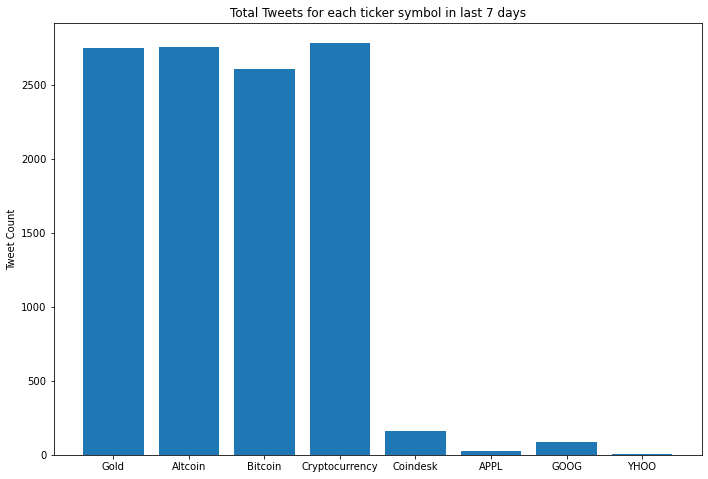

In [ ]:
Keywords_list = list(Cummulative_DataFrame['Keywords'])
Keywords_count = list(Cummulative_DataFrame['Count'])
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.set_ylabel('Tweet Count')
ax.set_title("Total Tweets for each ticker symbol in last 7 days")
ax.bar(Keywords_list, Keywords_count)

In [ ]:
#Grouping the tweets by the creation date 
Gold_tweets=gold.groupby('time of tweet')['text'].count()
Altcoin_tweets=Altcoin.groupby('time of tweet')['text'].count()
Bitcoin_tweets=Bitcoin.groupby('time of tweet')['text'].count()
Cryptocurrency_tweets=Cryptocurrency.groupby('time of tweet')['text'].count()
Coindesk_tweets=Coindesk.groupby('time of tweet')['text'].count()
APPL_tweets=APPL.groupby('time of tweet')['text'].count()
GOOG_tweets=GOOG.groupby('time of tweet')['text'].count()
YHOO_tweets=YHOO.groupby('time of tweet')['text'].count()

In [ ]:
Gold_users=gold.groupby('time of tweet')['user name'].count()
Altcoin_users=Altcoin.groupby('time of tweet')['user name'].count()
Bitcoin_users=Bitcoin.groupby('time of tweet')['user name'].count()
Cryptocurrency_users=Cryptocurrency.groupby('time of tweet')['user name'].count()
Coindesk_users=Coindesk.groupby('time of tweet')['user name'].count()
APPL_users=APPL.groupby('time of tweet')['user name'].count()
GOOG_users=GOOG.groupby('time of tweet')['user name'].count()
YHOO_users=YHOO.groupby('time of tweet')['user name'].count()

#### Daily Number of Tweets 

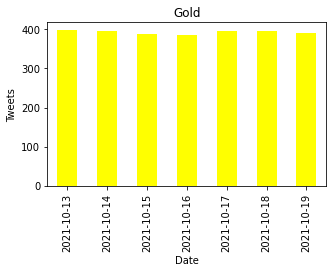

In [ ]:
Gold_tweets.plot(kind='bar',color='yellow',figsize=(5,3))
plt.title('Gold')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

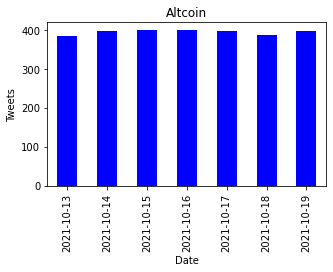

In [ ]:
Altcoin_tweets.plot(kind='bar',color='blue',figsize=(5,3))
plt.title('Altcoin')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

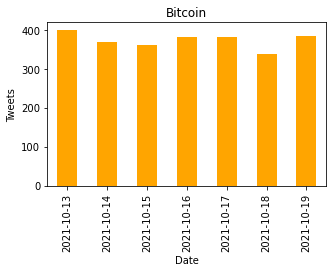

In [ ]:
Bitcoin_tweets.plot(kind='bar',color='orange',figsize=(5,3))
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

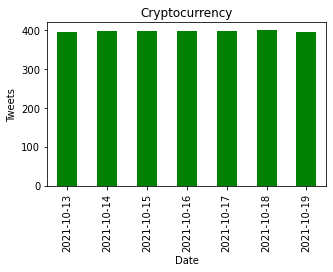

In [ ]:
Cryptocurrency_tweets.plot(kind='bar',color='green',figsize=(5,3))
plt.title('Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

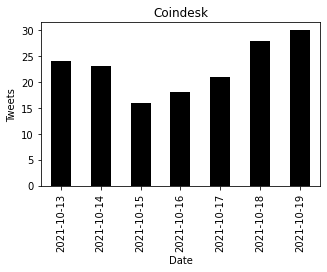

In [ ]:
Coindesk_tweets.plot(kind='bar',color='black',figsize=(5,3))
plt.title('Coindesk')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

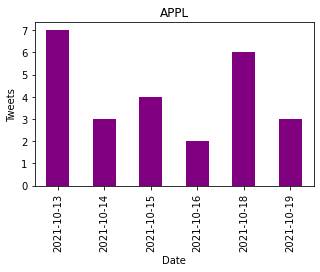

In [ ]:
APPL_tweets.plot(kind='bar',color='purple',figsize=(5,3))
plt.title('APPL')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

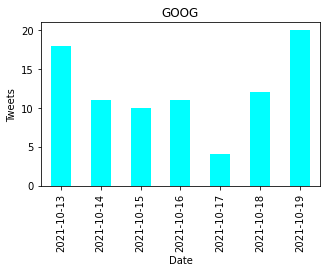

In [ ]:
GOOG_tweets.plot(kind='bar',color='cyan',figsize=(5,3))
plt.title('GOOG')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

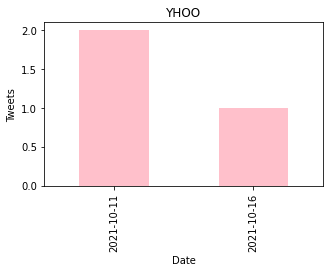

In [ ]:
YHOO_tweets.plot(kind='bar',color='pink',figsize=(5,3))
plt.title('YHOO')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

#### Daily Numbers and percentage of Users 

#### Since one user can post any number of different tweets it's necessary to find the unique group of users for each day

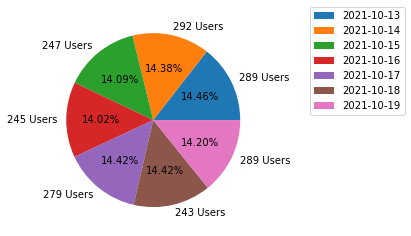

In [ ]:
#GOLD users
GoldUsers_Unique = gold.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
Gold_users.plot(kind='pie', labels=[str(len(GoldUsers_Unique[0]))+" Users", str(len(GoldUsers_Unique[1]))+" Users", 
                                    str(len(GoldUsers_Unique[2]))+" Users", str(len(GoldUsers_Unique[3]))+" Users",
                                    str(len(GoldUsers_Unique[4]))+" Users", str(len(GoldUsers_Unique[5]))+" Users",
                                    str(len(GoldUsers_Unique[0]))+" Users"],
                autopct='%1.2f%%')
plt.legend(loc="lower left", labels=Gold_users.index, bbox_to_anchor=(1.2,0.5))
plt.axis("off")
plt.show()

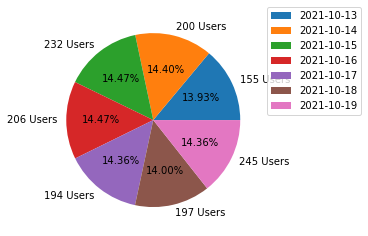

In [ ]:
#Altcoin Users
AltcoinUsers_Unique = Altcoin.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
Altcoin_users.plot(kind='pie', labels=[str(len(AltcoinUsers_Unique[0]))+" Users", str(len(AltcoinUsers_Unique[1]))+" Users", 
                                       str(len(AltcoinUsers_Unique[2]))+" Users", str(len(AltcoinUsers_Unique[3]))+" Users",
                                       str(len(AltcoinUsers_Unique[4]))+" Users", str(len(AltcoinUsers_Unique[5]))+" Users",
                                       str(len(AltcoinUsers_Unique[6]))+" Users"],
                autopct='%1.2f%%')
plt.legend(loc="lower left", labels=Altcoin_users.index,  bbox_to_anchor=(1,0.5))
plt.axis("off")
plt.show()

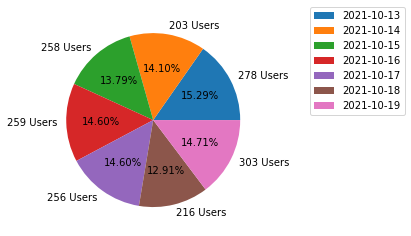

In [ ]:
#Bitcoin users
BitcoinUsers_Unique = Bitcoin.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
Bitcoin_users.plot(kind='pie', labels=[str(len(BitcoinUsers_Unique[0]))+" Users", str(len(BitcoinUsers_Unique[1]))+" Users", 
                                       str(len(BitcoinUsers_Unique[2]))+" Users", str(len(BitcoinUsers_Unique[3]))+" Users",
                                       str(len(BitcoinUsers_Unique[4]))+" Users", str(len(BitcoinUsers_Unique[5]))+" Users",
                                       str(len(BitcoinUsers_Unique[6]))+" Users"],
                autopct='%1.2f%%')
plt.legend(loc="lower left", labels=Bitcoin_users.index, bbox_to_anchor=(1.2, 0.5))
plt.axis("off")
plt.show()

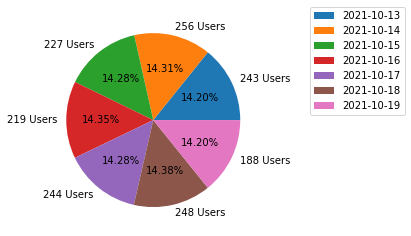

In [ ]:
#Cryptocurrency users
CryptocurrencyUsers_Unique = Cryptocurrency.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
Cryptocurrency_users.plot(kind='pie', labels=[str(len(CryptocurrencyUsers_Unique[0]))+" Users", str(len(CryptocurrencyUsers_Unique[1]))+" Users", 
                                              str(len(CryptocurrencyUsers_Unique[2]))+" Users", str(len(CryptocurrencyUsers_Unique[3]))+" Users",
                                              str(len(CryptocurrencyUsers_Unique[4]))+" Users", str(len(CryptocurrencyUsers_Unique[5]))+" Users",
                                              str(len(CryptocurrencyUsers_Unique[6]))+" Users"],
                autopct='%1.2f%%')
plt.legend(loc="lower left", labels=Cryptocurrency_users.index, bbox_to_anchor=(1.2, 0.5))
plt.axis("off")
plt.show()

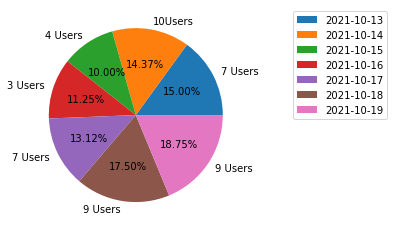

In [ ]:
#Coindesk users
CoindeskUsers_Unique = Coindesk.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
Coindesk_users.plot(kind='pie', labels=[str(len(CoindeskUsers_Unique[0]))+" Users", str(len(CoindeskUsers_Unique[1]))+"Users", 
                                        str(len(CoindeskUsers_Unique[2]))+" Users", str(len(CoindeskUsers_Unique[3]))+" Users",
                                        str(len(CoindeskUsers_Unique[4]))+" Users", str(len(CoindeskUsers_Unique[5]))+" Users",
                                       str(len(CoindeskUsers_Unique[6]))+" Users"],
                                        
                autopct='%1.2f%%')
plt.legend(loc="best", labels=Coindesk_users.index, bbox_to_anchor=(1.2, 1))
plt.axis("off")
plt.show()

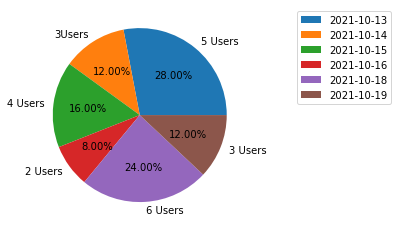

In [ ]:
#APPL users
APPLUser_Unique = APPL.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
APPL_users.plot(kind='pie', labels=[str(len(APPLUser_Unique[0]))+" Users", str(len(APPLUser_Unique[1]))+"Users", 
                                        str(len(APPLUser_Unique[2]))+" Users", str(len(APPLUser_Unique[3]))+" Users",
                                        str(len(APPLUser_Unique[4]))+" Users", str(len(APPLUser_Unique[5]))+" Users"],
                                        
                autopct='%1.2f%%')
plt.legend(loc="best", labels=APPL_users.index, bbox_to_anchor=(1.2, 1))
plt.axis("off")
plt.show()

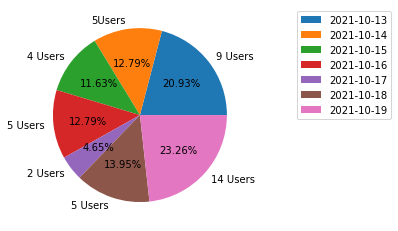

In [ ]:
#GOOG users
GOOGUser_Unique = GOOG.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
GOOG_users.plot(kind='pie', labels=[str(len(GOOGUser_Unique[0]))+" Users", str(len(GOOGUser_Unique[1]))+"Users", 
                                    str(len(GOOGUser_Unique[2]))+" Users", str(len(GOOGUser_Unique[3]))+" Users",
                                    str(len(GOOGUser_Unique[4]))+" Users", str(len(GOOGUser_Unique[5]))+" Users",
                                    str(len(GOOGUser_Unique[6]))+" Users"],
                                        
                autopct='%1.2f%%')
plt.legend(loc="best", labels=GOOG_users.index, bbox_to_anchor=(1.2, 1))
plt.axis("off")
plt.show()

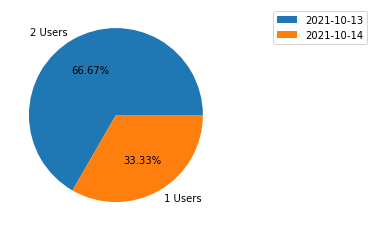

In [ ]:
#YHOO users
YHOOUser_Unique = YHOO.groupby('time of tweet')['user name'].apply(lambda x: list(np.unique(x)))
YHOO_users.plot(kind='pie', labels=[str(len(YHOOUser_Unique[0]))+" Users", str(len(YHOOUser_Unique[1]))+" Users"],
                                        
                autopct='%1.2f%%')
plt.legend(loc="best", labels=GOOG_users.index, bbox_to_anchor=(1.2, 1))
plt.axis("off")
plt.show()

#### From the above the graphs and tables we can conclude by saying that there is a direct link with the Twitter stock trends and the number of Tweets. The most popular ticker symbol is "CrpytoCurrency" and the least popular one is "YHOO" 